In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
X,y = make_regression(n_features=1,n_samples=500,bias=2.5,noise=3.5)
print(X.shape)
print(y.shape)

(500, 1)
(500,)


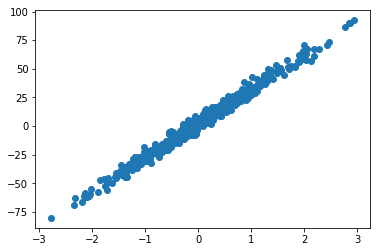

In [3]:
plt.scatter(X[:,0],y)
plt.show()

In [46]:
class Linear_Regression:
    def __init__(self,X,y):
        self.X=X
        self.y=y
        self.w0=np.random.random()
        self.w1=np.random.uniform(low=-1,high=1)
    def predict(self,x):
       # print(x)
        return self.w0+self.w1*x
        
    def compute_loss(self):
        tot_loss=[]
        for x,y in zip(self.X,self.y):
            yhat=self.predict(x)
            loss=(yhat-y)**2
            tot_loss.append(loss)
        tot_loss=np.array(tot_loss)
        tot_loss=np.sum(tot_loss)/(2*self.X.shape[0])
        return tot_loss
    def calculate_gradients(self):
        grad0_list=[]
        grad1_list=[]
        for x,y in zip(self.X,self.y):
            yhat=self.predict(x)
            grad0_list.append((yhat-y))
            grad1_list.append((yhat-y)*(x))
        grad0_list=np.array(grad0_list)
        grad1_list=np.array(grad1_list)
        grad0=np.sum(grad0_list)/self.X.shape[0]
        grad1=np.sum(grad1_list)/self.X.shape[0]
        return (grad0,grad1)
        
    def update_gradients(self,gradients,learning_rate=0.01):
        self.w0=self.w0-(learning_rate*gradients[0])
        self.w1=self.w1-(learning_rate*gradients[1])
    def train(self,losses,iterations,learning_rate):
        for i in range(iterations):
            gradients=self.calculate_gradients()
            self.update_gradients(gradients,learning_rate)
            losses.append(self.compute_loss())
           # plot_best_fit(self.predict_all())
        return losses
    def predict_all(self):
        predictions=[]
        for x in self.X:
            one_pred=self.predict(x)
            predictions.append(one_pred)
        return predictions
        

In [47]:
lr=Linear_Regression(X,y)

In [48]:
losses=[]
initial_loss=lr.compute_loss()
losses.append(initial_loss)
#print(losses)

In [49]:
initial_preds=lr.predict_all()

In [50]:
def plot_best_fit(preds):
    plt.scatter(X[:,0],y)
    plt.plot(X[:,0],preds,color='r')
    plt.show()

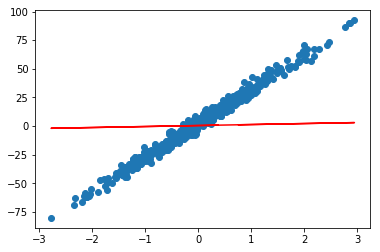

In [51]:
plot_best_fit(initial_preds)

In [52]:
lr.train(losses,1000,0.01)

[404.55204752579345,
 396.9909824328111,
 389.57345470511336,
 382.29673819720654,
 375.158158565285,
 368.1550922824077,
 361.28496567240654,
 354.5452539621719,
 347.9334803519643,
 341.44721510340975,
 335.08407464484134,
 328.84172069365883,
 322.71785939537995,
 316.7102404790675,
 310.8166564288205,
 305.034941671022,
 299.36297177704677,
 293.798662681131,
 288.3399699131189,
 282.9848878458006,
 277.7314489565651,
 272.5777231030952,
 267.52181681283747,
 262.5618725859852,
 257.6960682117172,
 252.92261609743952,
 248.2397626107842,
 243.64578743412054,
 239.13900293134216,
 234.71775352669545,
 230.38041509542097,
 226.1253943659822,
 221.95112833366224,
 217.85608368531084,
 213.83875623503118,
 209.8976703705967,
 206.03137851039506,
 202.2384605706982,
 198.51752344306226,
 194.8672004816649,
 191.28615100039048,
 187.77305977947788,
 184.32663658154954,
 180.94561567684187,
 177.62875537746373,
 174.3748375805098,
 171.18266731986142,
 168.05107232650857,
 164.97890259723

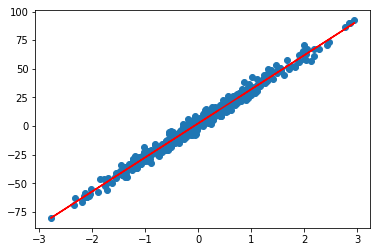

In [53]:
final_pred=lr.predict_all()
plot_best_fit(final_pred)

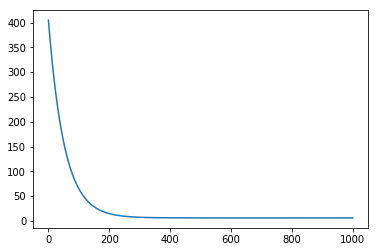

In [54]:
plt.plot(losses)
plt.show()

# SKLearn

In [24]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
boston=load_boston()

In [32]:
print(boston.data)
print(boston.target)
print(boston.data.shape)
print(boston.target.shape)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

In [36]:
X_train,X_test,y_train,y_test=train_test_split(boston.data,boston.target,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [39]:
sklr=LinearRegression(normalize=True)

In [40]:
sklr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [41]:
print("sklearn train ",sklr.score(X_train,y_train))
print("sklearn test",sklr.score(X_test,y_test))

sklearn train  0.7470274969588904
sklearn test 0.7137099024160918
